In [1]:
import pandahouse
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc ={'figure.figsize':(15,10)})

connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20221120'
    }

## Тест групп 0 и 3

In [5]:
q = """
    SELECT
        exp_group,
        user_id,
        sum(action = 'like') as likes,
        sum(action = 'view') as views,
        likes / views as ctr
    FROM
        simulator_20221120.feed_actions
    WHERE
        toDate(time) BETWEEN '2022-11-02' AND '2022-11-08'
        AND exp_group in (0, 3)
    GROUP BY
        exp_group,
        user_id
    """


df = pandahouse.read_clickhouse(q, connection=connection)

df.head()

,exp_group,user_id,likes,views,ctr
0,3,115383,9,30,0.300000
1,3,123580,13,48,0.270833
2,0,4944,8,41,0.195122
3,0,4504,5,15,0.333333
4,0,121508,18,88,0.204545


In [8]:
# Считаем общий CTR в контрольной группе  𝐶𝑇𝑅𝑐𝑜𝑛𝑡𝑟𝑜𝑙=𝑠𝑢𝑚(𝑙𝑖𝑘𝑒𝑠)/𝑠𝑢𝑚(𝑣𝑖𝑒𝑤𝑠) 

ctr_control = df[df.exp_group == 0].likes.sum() / df[df.exp_group == 0].views.sum()

ctr_control

0.20823612262916305

In [12]:
# Посчитаем поюзерную метрику linearized_likes 
df['linearized_likes'] = df['likes'] - ctr_control * df['views']

df.head()

,exp_group,user_id,likes,views,ctr,linearized_likes
0,3,115383,9,30,0.300000,2.752916
1,3,123580,13,48,0.270833,3.004666
2,0,4944,8,41,0.195122,-0.537681
3,0,4504,5,15,0.333333,1.876458
4,0,121508,18,88,0.204545,-0.324779


Text(0.5, 1.0, 'Linearized_likes')

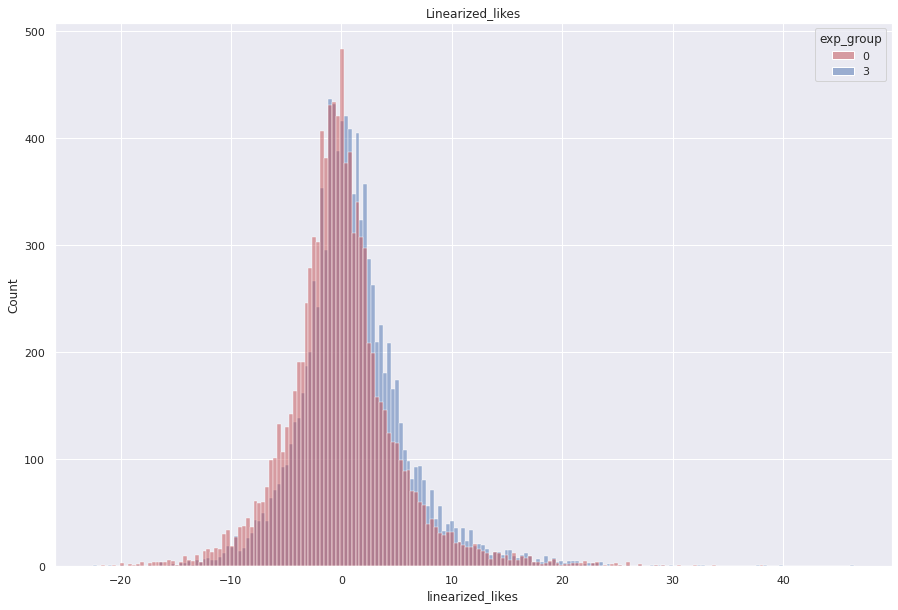

In [16]:
ax = sns.histplot(df, x = 'linearized_likes', hue = 'exp_group', palette = ['r','b'], kde=False)
ax.set_title('Linearized_likes')

In [17]:
# t-test до линеаризации

stats.ttest_ind(df[df.exp_group == 0].ctr,
                df[df.exp_group == 3].ctr,
                equal_var=False)

Ttest_indResult(statistic=-13.89687072190407, pvalue=1.055849414662529e-43)

In [18]:
# t-test после линеаризации

stats.ttest_ind(df[df.exp_group == 0].linearized_likes,
                df[df.exp_group == 3].linearized_likes,
                equal_var=False)

Ttest_indResult(statistic=-15.214995460903827, pvalue=5.4914249479690016e-52)

В результате теста между группами 0 и 3 по метрике линеаризованных лайков, видно отличие, 
𝑝−𝑣𝑎𝑙𝑢𝑒 стало меньше

## Тест групп 1 и 2

In [8]:
# Считаем общий CTR в контрольной группе  𝐶𝑇𝑅𝑐𝑜𝑛𝑡𝑟𝑜𝑙=𝑠𝑢𝑚(𝑙𝑖𝑘𝑒𝑠)/𝑠𝑢𝑚(𝑣𝑖𝑒𝑤𝑠) 

ctr_control = df[df.exp_group == 0].likes.sum() / df[df.exp_group == 0].views.sum()

ctr_control

0.20823612262916305

In [19]:
q = """
    SELECT
        exp_group,
        user_id,
        sum(action = 'like') as likes,
        sum(action = 'view') as views,
        likes / views as ctr
    FROM
        simulator_20221120.feed_actions
    WHERE
        toDate(time) BETWEEN '2022-11-02' AND '2022-11-08'
        AND exp_group in (1, 2)
    GROUP BY
        exp_group,
        user_id
    """


df = pandahouse.read_clickhouse(q, connection=connection)

df.head()

,exp_group,user_id,likes,views,ctr
0,1,109963,3,15,0.200000
1,1,26117,32,141,0.226950
2,1,138232,18,73,0.246575
3,1,26295,33,122,0.270492
4,1,18392,7,32,0.218750


In [21]:
# Считаем общий CTR в контрольной группе  𝐶𝑇𝑅𝑐𝑜𝑛𝑡𝑟𝑜𝑙=𝑠𝑢𝑚(𝑙𝑖𝑘𝑒𝑠)/𝑠𝑢𝑚(𝑣𝑖𝑒𝑤𝑠) 

ctr_control = df[df.exp_group == 1].likes.sum() / df[df.exp_group == 1].views.sum()

ctr_control

0.20802680490126244

In [22]:
# Посчитаем поюзерную метрику linearized_likes 
df['linearized_likes'] = df['likes'] - ctr_control * df['views']

df.head()

,exp_group,user_id,likes,views,ctr,linearized_likes
0,1,109963,3,15,0.200000,-0.120402
1,1,26117,32,141,0.226950,2.668221
2,1,138232,18,73,0.246575,2.814043
3,1,26295,33,122,0.270492,7.620730
4,1,18392,7,32,0.218750,0.343142


ax = sns.histplot(df, x = 'linearized_likes', hue = 'exp_group', palette = ['r','b'], kde=False)
ax.set_title('Linearized_likes')

In [25]:
# t-test до линеаризации

stats.ttest_ind(df[df.exp_group == 1].ctr,
                df[df.exp_group == 2].ctr,
                equal_var=False)

Ttest_indResult(statistic=0.709439204127032, pvalue=0.47806231308750413)

In [24]:
# t-test после линеаризации

stats.ttest_ind(df[df.exp_group == 1].linearized_likes,
                df[df.exp_group == 2].linearized_likes,
                equal_var=False)

Ttest_indResult(statistic=6.122579994775973, pvalue=9.439432187037712e-10)

Вывод: действительно, данный метод линеаризации позволяет увеличить чувствительность метрик-отношений.